<a href="https://colab.research.google.com/github/MatheusRocha0/Customers_Segmentation/blob/main/Customers_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation
 
Customer segmentation is a marketing activity that involves breaking down your customers into a number of groups. It is very useful when a company is developing a markering strategy and wants to know more about their customers.
 
In this project I am going to analyze data and also build a customer segmentation system using Machine Learning algorithms.
 
## About the Dataset
 
For this project, I will be using a dataset I found on Kaggle about a Customers Database. You can download it here: https://bit.ly/37Jfxgz
 
This dataset brings informations like: Customer Id, Customer Age, Customer Spending Score, Customer Annual Income and Customer Gender. But it is not labeled, so it is necessary to use an Unsupervised Learning algorithm to label the dataset and then analyze the labeled data to understand the customers behavior.

# Importing

## Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

## Data

In [2]:
data = pd.read_csv("/content/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Cleaning

## Detecting Missing Values

In [3]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Dropping Duplicates

In [4]:
data.drop_duplicates(inplace = True)

## Preprocessing Gender Variable

In [5]:
x = data.copy()
x = x.drop("CustomerID", axis = 1)
 
le = LabelEncoder().fit(x.Gender)
x.Gender = le.transform(x.Gender)
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Normalization 
 
Normalization is the process of reorganizing data in a database. Normalization is important for many reasons, but chiefly because it allows databases to take up as little disk space as possible, resulting in increased performance.

In [6]:
sc = StandardScaler().fit(x)
x = sc.transform(x)

# Exploratory Data Analysis (EDA)

## Dataset Shape

In [7]:
print("Observations:", data.shape[0])
print("Variables:", data.shape[1])

Observations: 200
Variables: 5


## Variables Types

In [8]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## Statistical Informations
 
**Mean**: The arithmetic mean (or simply mean) of a list of numbers, is the sum of all of the numbers divided by the amount of numbers. 
 
**Standard Deviation (std)**: The standard deviation is the average amount of variability in your dataset.
 
**Quartiles (25%, 50%, 75%)**: A quartile is a type of quantile which divides the number of data points into four more or less equal parts, or quarters. They mean the maximum value for x% of the variable.

In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Interesting Things:
 
• Maximum age is 70 and minimum age is 18.
 
• People who are older than 49 are not commom
 
• People with Annual Income greater than 78 are not commom.
 
• Spending Score mean is 50. 
 
• People with Spending Score greater than 73 are not commom.

## Gender Variable Distribution

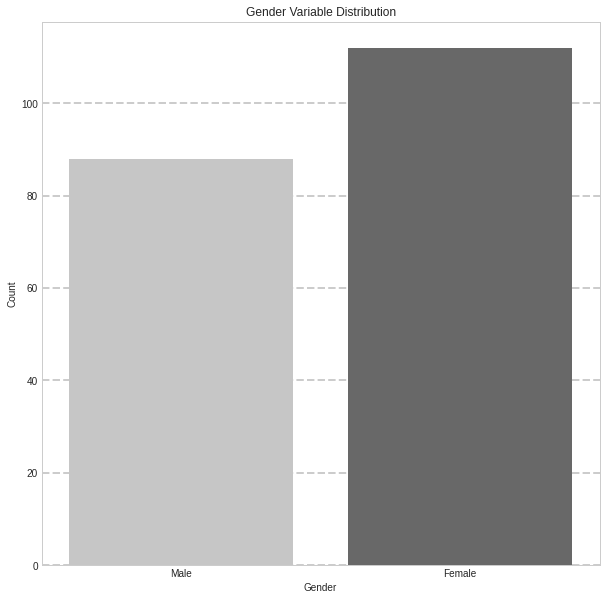

In [10]:
plt.style.use("seaborn-whitegrid")
 
plt.figure(figsize = (10, 10))
sb.countplot(data = data, x = "Gender", palette = "Greys")
plt.title("Gender Variable Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(True, axis = "y", linewidth = 2, linestyle = "--")
plt.show()

There are more Women than Men in the Customers Database.

## Age Variable Distribution

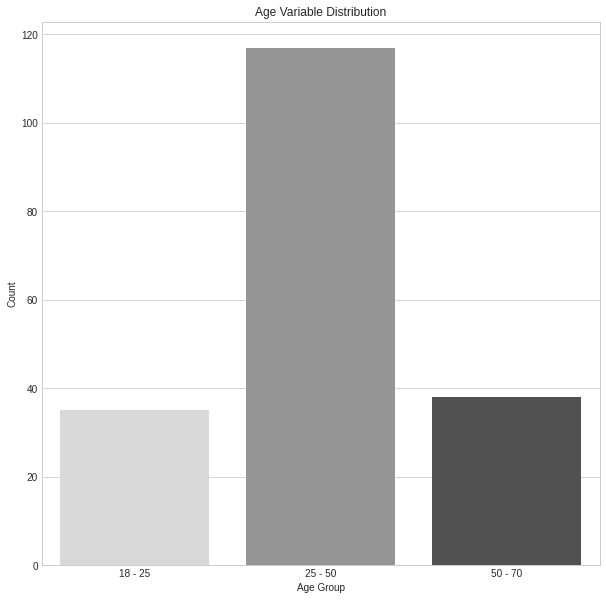

In [11]:
age18_25 = len(data.Age.loc[data.Age < 25])
age25_50 = len(data.Age.loc[(data.Age > 25) & (data.Age < 50)])
age50_70 = len(data.Age.loc[(data.Age > 50) & (data.Age < 70)])
 
labels = [
"18 - 25", "25 - 50", "50 - 70"
]
 
values = [
 age18_25, age25_50, age50_70
]
 
plt.figure(figsize = (10, 10))
sb.barplot(x = labels, y = values, palette = "Greys")
plt.title("Age Variable Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

Most of people are between 25 and 50 years old. Probably this bar is composed majority by younger people, since people who are over 49 are not commom in this dataset.

## Annual Income Distribution

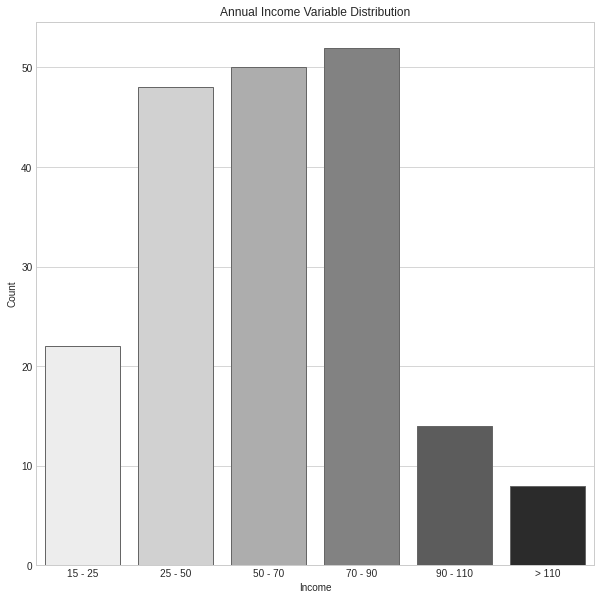

In [12]:
ai15_25 = len(data["Annual Income (k$)"].loc[data["Annual Income (k$)"] < 25])
ai25_50 = len(data["Annual Income (k$)"].loc[(data["Annual Income (k$)"] > 25) & (data["Annual Income (k$)"] < 50)])
ai50_70 = len(data["Annual Income (k$)"].loc[(data["Annual Income (k$)"] > 50) & (data["Annual Income (k$)"] < 70)])
ai70_90 = len(data["Annual Income (k$)"].loc[(data["Annual Income (k$)"] > 70) & (data["Annual Income (k$)"] < 90)])
ai90_110 = len(data["Annual Income (k$)"].loc[(data["Annual Income (k$)"] > 90) & (data["Annual Income (k$)"] < 110)])
ai_others = len(data["Annual Income (k$)"].loc[(data["Annual Income (k$)"] > 110)])
 
labels = [
"15 - 25", "25 - 50", "50 - 70", "70 - 90", "90 - 110", "> 110"
]
 
values = [
ai15_25, ai25_50, ai50_70, ai70_90, ai90_110, ai_others
]
 
plt.figure(figsize = (10, 10))
sb.barplot(x = labels, y = values, palette = "Greys", edgecolor = ".4")
plt.title("Annual Income Variable Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

Most of people have an annual income of 25 to 90.

## Spending Score Distribution

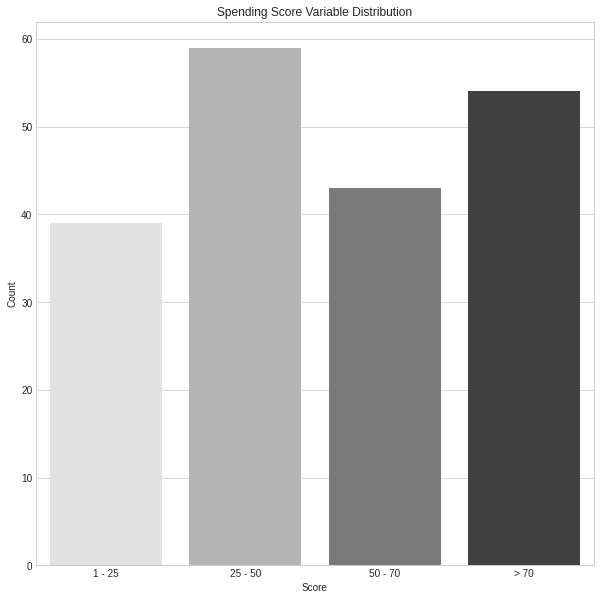

In [13]:
 
ss1_25 = len(data["Spending Score (1-100)"].loc[data["Spending Score (1-100)"] < 25])
ss25_50 = len(data["Spending Score (1-100)"].loc[(data["Spending Score (1-100)"] > 25) & (data["Spending Score (1-100)"] < 50)])
ss50_70 = len(data["Spending Score (1-100)"].loc[(data["Spending Score (1-100)"] > 50) & (data["Spending Score (1-100)"] < 70)])
ss_others = len(data["Spending Score (1-100)"].loc[data["Spending Score (1-100)"] > 70])
 
labels = [
"1 - 25", "25 - 50", "50 - 70", "> 70"
]
 
values = [
ss1_25, ss25_50, ss50_70, ss_others
]
 
plt.figure(figsize = (10, 10))
sb.barplot(x = labels, y = values, palette = "Greys")
plt.title("Spending Score Variable Distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

This distribution is balanced.

## Annual Income By Gender

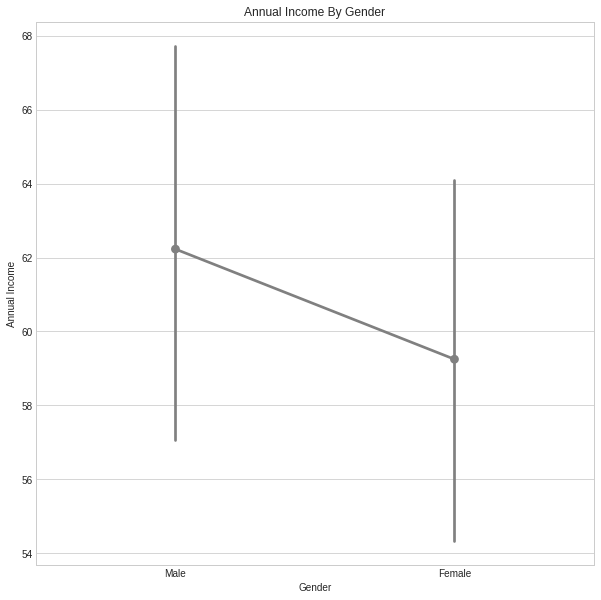

In [14]:
plt.figure(figsize = (10, 10))
sb.pointplot(data = data, y = "Annual Income (k$)", x = "Gender", color = "gray")
plt.title("Annual Income By Gender")
plt.ylabel("Annual Income")
plt.xlabel("Gender")
plt.show()

Men make more money than Women.

## Spending Score By Gender

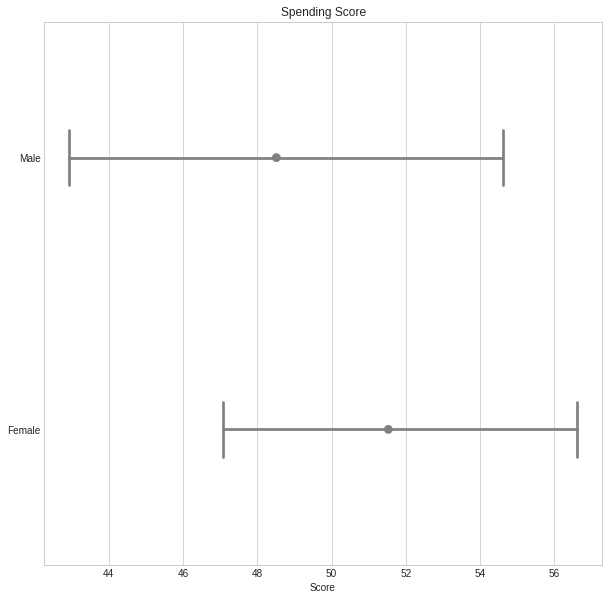

In [15]:
plt.figure(figsize = (10, 10))
sb.pointplot(color = "gray", data = data, x = "Spending Score (1-100)", y = "Gender", kind = "point", join = False, capsize = .2)
plt.title("Spending Score")
plt.xlabel("Score")
plt.ylabel("")
plt.show()

Even men making more, women still spend more.

## Age Distribution By Gender

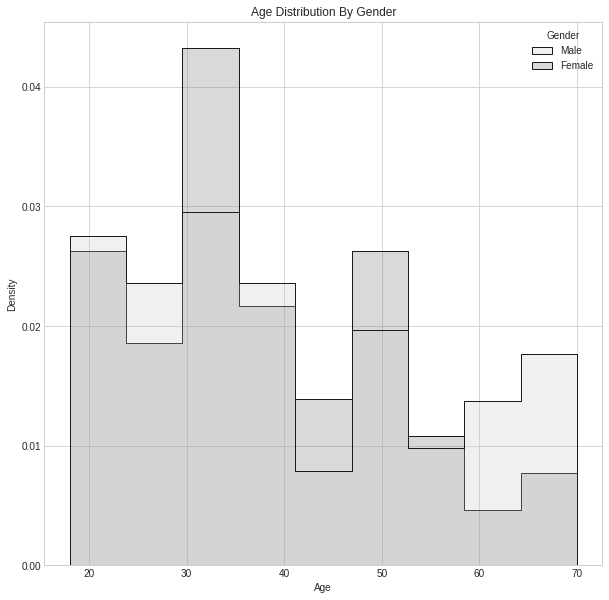

In [16]:
plt.figure(figsize = (10, 10))
sb.histplot(data = data, x = "Age", hue = "Gender", element = "step", edgecolor = ".1", stat = "density", common_norm = False, palette = "Greys")
plt.title("Age Distribution By Gender")
plt.xlabel("Age")
plt.show()

Most of young people (18 - 30) are Men.
 
Most of people who are 40 are also Women.
 
Most of older people (60 - 70) are Men.

## Annual Income By Age

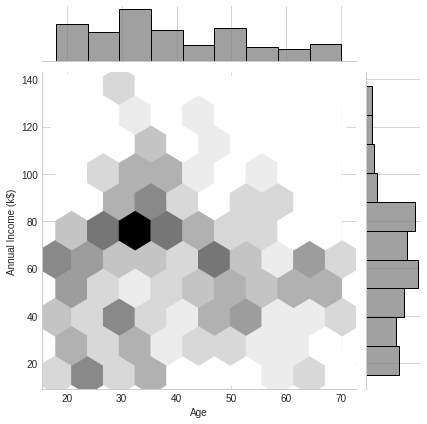

In [17]:
sb.jointplot(color = "gray", data = data, x = "Age", y = "Annual Income (k$)", kind = "hex")
plt.show()

This plot shows the distribution considering Age and Annual Income.
 
A dark color means that there are many customers with those characteristics and a light color is the opposite.
 
The strongest distribution here is that there are many people who are 30 - 40 and have an annual income of 62 - 84 thousands of dollars.

## Spending Score By Annual Income

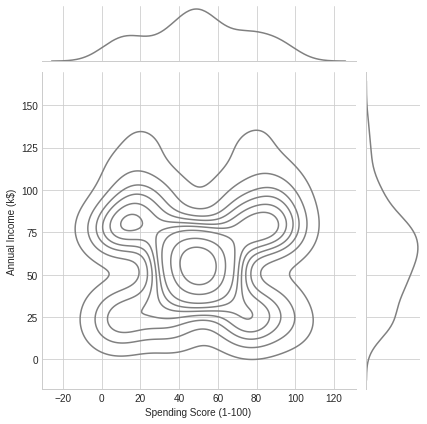

In [18]:
sb.jointplot(color = "gray", data = data, x = "Spending Score (1-100)", y = "Annual Income (k$)", kind = "kde")
plt.show()


This plot ia showing that the distribution is very balanced.

Something visible here is that there is a tendency to 5 groups in this plot. This may influence the optimal number of K-Clusters in the algorithm that will be used to label the dataset.

# Machine Learning Model
 
## K-Means and Unsupervised Learning
 
Since it is a Clustering task, I will be using the KMeans Algorithm to solve this problem.
 
**Unsupervised Learning**: Unsupervised learning is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision.
 
**K-Means**: Being a clustering algorithm, k-Means takes data points as input and groups them into k clusters. This process of grouping is the training phase of the learning algorithm. The result would be a model that takes a data sample as input and returns the cluster that the new data point belongs to, according the training that the model went through.

## Elbow Method

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

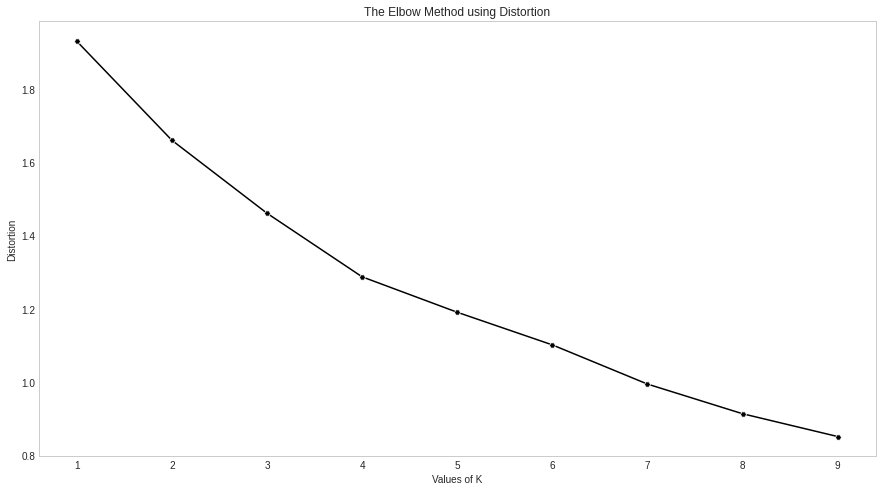

In [19]:
 
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
 
    kmeanModel = KMeans(n_clusters=k).fit(x) 
    kmeanModel.fit(x)     
      
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / x.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / x.shape[0] 
    mapping2[k] = kmeanModel.inertia_
 
plt.figure(figsize = (15, 8))
sb.lineplot(color = "black", x = K, y = distortions, marker = "H") 
plt.xlabel('Values of K') 
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.grid(False)
plt.show()

This plot is not so clear, but I have a hyphotesis about the optimal number of clusters. I think the optimal number is 5, since we could see this tendency in one of the plots above.

But to be sure and have a better idea, I will genetate a Pairplot and see the relationship between variables.

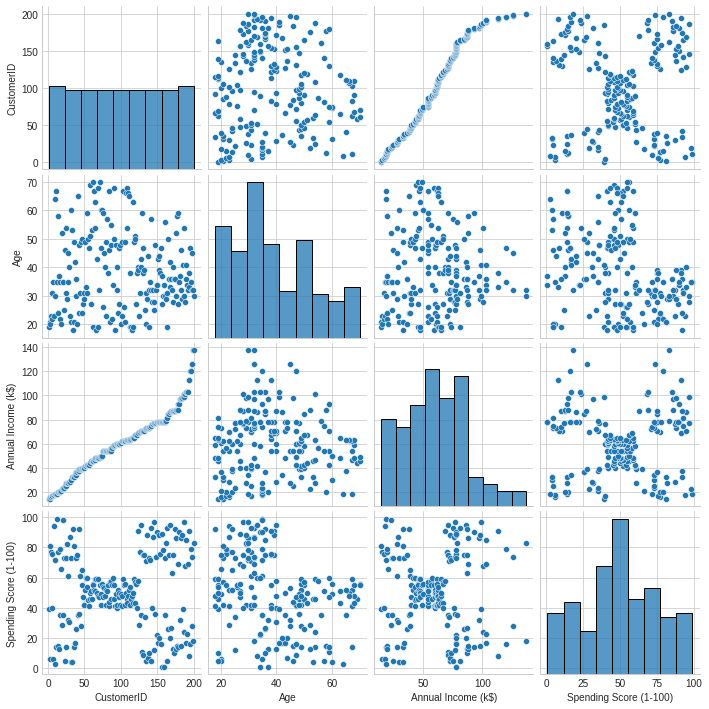

In [20]:
sb.pairplot(data)
plt.show()

We can also see the 5-Clusters-Tendency in 2 plots above, so let's set n_clusters as 5.

## Final Model

In [21]:
kmeans = KMeans(n_clusters = 5, random_state = 1, n_jobs = -1, max_iter = 1000, algorithm = "elkan")
kmeans.fit(x)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

Since the dataset is not labeled, it is not possible to evaluate this model.

## Labeling the Dataset
 
Now it is possible to label the dataset using the K Labels.

In [22]:
data["k"] = kmeans.labels_

## Pair Plot

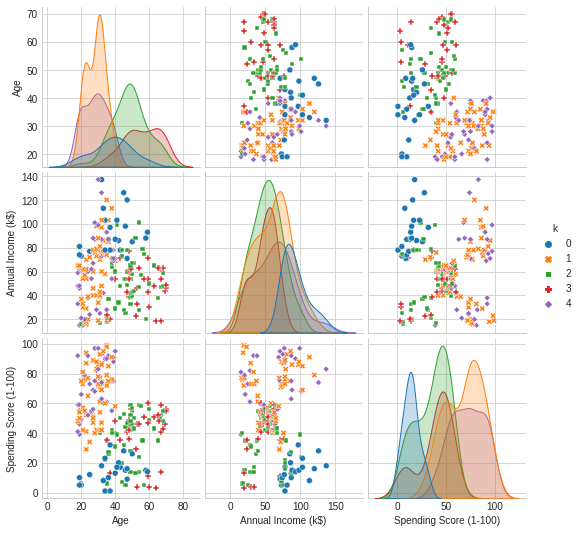

In [23]:
sb.pairplot(palette = "tab10", data = data.drop("CustomerID", axis = 1), hue = "k", markers = True)
plt.show()

This plot does not show the Gender variable, so I will plot another chart.

## Gender By K-Label

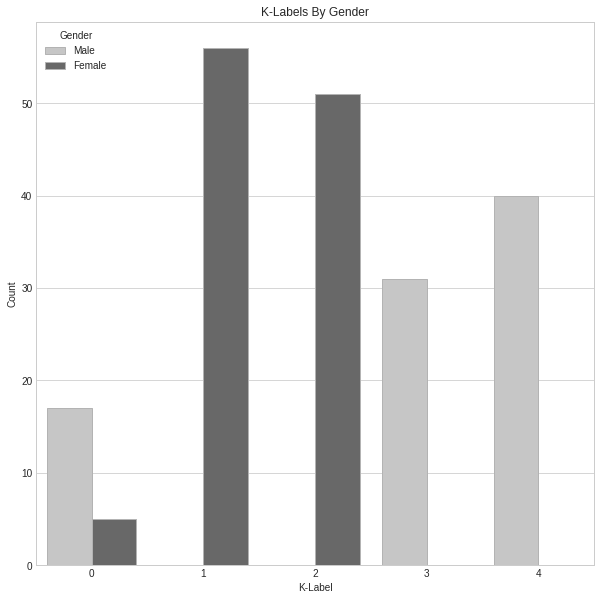

In [24]:
plt.figure(figsize = (10, 10))
sb.countplot(data = data, x = "k", hue = "Gender", edgecolor = ".7", palette = "Greys")
plt.title("K-Labels By Gender")
plt.xlabel("K-Label")
plt.ylabel("Count")
plt.show()

# Conclusion
 
**Group 1 and 4** do not need to be stimulated since they have a high spending score. These are the best customers.
 
**Group 0** has a very high income and a very low Spending Score. They probably do not like buying from the company. This group should be more stimulated.
 
**Group 2 and 3** have low income and low spending score. There is no much to do about these groups.